In [38]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/nick/python/ASoP_global/ASoP-Coherence')
from asop_coherence_global_temporal import get_asop_dict
import matplotlib.cm as mpl_cm

In [3]:
awi_dict = get_asop_dict('AWI')
gpm_dict = get_asop_dict('GPM_IMERG')

In [31]:
awi_summary_filename = awi_dict['desc']+'_asop_temporal_summary_wetseason1d24.nc'
awi_temporal_summary = iris.load_cube(str(awi_dict['dir']/awi_summary_filename),'Temporal intermittency on-off metric based on 4 divisions (mean of all months in wet season)')
awi_temporal_summary.long_name = 'Temporal coherence metric, 4 divisions, all months, 3hr - AWI'
gpm_summary_filename = gpm_dict['desc']+'_asop_temporal_summary_wetseason1d24.nc'
gpm_temporal_summary = iris.load_cube(str(gpm_dict['dir']/gpm_summary_filename),'Temporal intermittency on-off metric based on 4 divisions (mean of all months in wet season)')
gpm_temporal_summary.long_name = 'Temporal coherence metric, 4 divisions, all months, 3hr - GPM_IMERG'

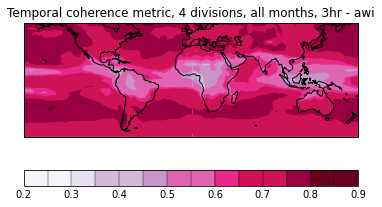

In [42]:
contour_levels = [0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
brewer_cmap = mpl_cm.get_cmap('brewer_PuRd_09')
qplt.contourf(awi_temporal_summary,cmap=brewer_cmap,levels=contour_levels,title='Help')
plt.gca().coastlines()
plt.show()

In [50]:
#gpm_temporal_summary.coord('longitude').cyclic = True
gpm_plot = gpm_temporal_summary.interpolate(awi_temporal_summary,iris.analysis.Nearest(extrapolation_mode='extrapolate',mdtol=1))
qplt.contourf(gpm_plot,cmap=brewer_cmap,levels=contour_levels,title='Help')
plt.gca().coastlines()
plt.show()

TypeError: __init__() got an unexpected keyword argument 'mdtol'

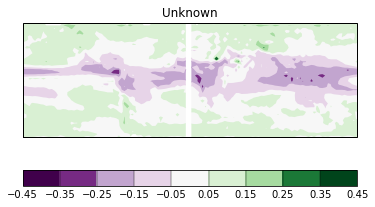

In [45]:
diff_levels=[-0.45,-0.35,-0.25,-0.15,-0.05,0.05,0.15,0.25,0.35,0.45]
diff_cmap = mpl_cm.get_cmap('brewer_PRGn_11')
qplt.contourf(awi_temporal_summary-gpm_temporal_summary,cmap=diff_cmap,levels=diff_levels)